In [1]:
%load_ext autoreload
%autoreload 2


In [2]:
import warnings

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

%matplotlib inline


In [3]:
from structures import *


In [4]:
warnings.filterwarnings("ignore", category=UserWarning)

env = RingRoad(
    num_vehicles = 22,
    ring_length = 230.0,
    starting_noise = 4.0,
    temporal_res = 0.3,
    av_activate= 40,
    seed = 286,
)
env.run(steps=int(80/env.dt))


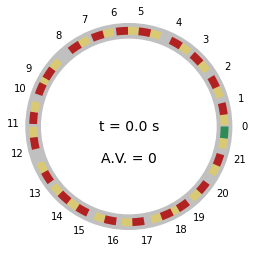

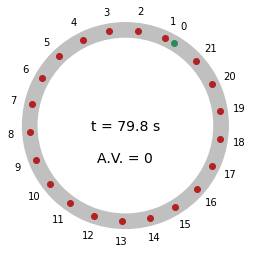

In [5]:
fig,ax = env.visualize(step=0, draw_cars_to_scale=True, draw_safety_buffer=True, label_step=True, label_cars=True)
# fig,ax = env.visualize(step=1, draw_cars_to_scale=False, label_cars=True)
# fig,ax = env.visualize(step=2, draw_cars_to_scale=False, label_cars=True)
fig,ax = env.visualize(draw_cars_to_scale=False)  # Defaults to latest state.
plt.show()


(<Figure size 1152x288 with 1 Axes>,
 <AxesSubplot:xlabel='time (seconds)', ylabel='position (meters)'>)

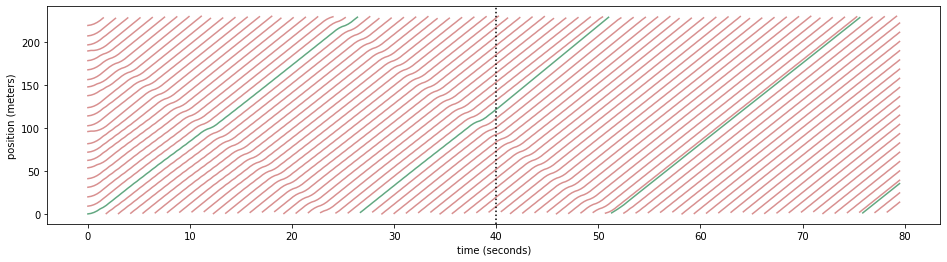

In [6]:
env.plot_positions()


(<Figure size 1152x288 with 1 Axes>,
 <AxesSubplot:xlabel='time (seconds)', ylabel='velocity (meters/second)'>)

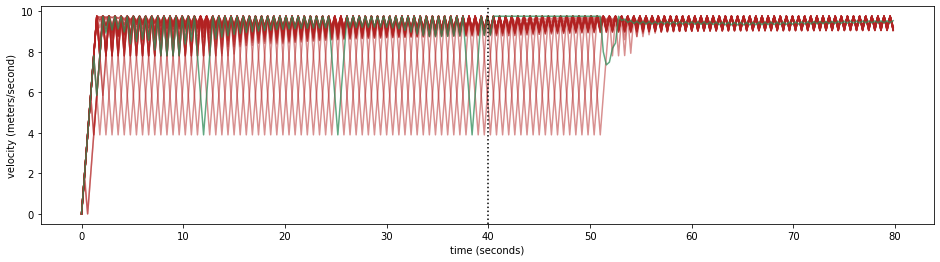

In [7]:
env.plot_velocities()


In [8]:
steps_before = range(0,env.av_activate)
steps_after = range(env.av_activate, env.step)
speeds_before = env.get_vehicle_vel_table(steps_before)
speeds_after = env.get_vehicle_vel_table(steps_after)
print("Mean standard deviation before: {}".format(speeds_before.std(axis=0).mean()))
print("Mean standard deviation after: {}".format(speeds_after.std(axis=0).mean()))
df_before = pd.DataFrame(speeds_before.std(axis=0).to_frame(name='before AV control'))
df_after = pd.DataFrame(speeds_after.std(axis=0).to_frame(name='after AV control'))
pd.concat([df_before,df_after],axis=1)


Mean standard deviation before: 2.3395022397252743
Mean standard deviation after: 0.9491561920129964


,before AV control,after AV control
vehicle_id,,
0,2.173187,0.921774
1,2.282414,0.948280
2,2.276759,0.943491
3,2.265595,0.942974
4,2.273150,0.942965
5,2.387030,0.943298
6,2.289604,0.943837
7,2.308967,0.944535
8,2.321914,0.945425


In [9]:
# for step in np.arange(0,100,10):
#     env.visualize(step=step, draw_cars_to_scale=False, label_cars=True)
